<a href="https://colab.research.google.com/github/ljs7463/Visualization/blob/master/%EC%A7%80%EB%8F%84%EC%8B%9C%EA%B0%81%ED%99%94/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 라이브러리 불러오기

In [ ]:
# 움직이는 barchart를 위한 라이브러리
!pip install bar_chart_race

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import bar_chart_race as bcr # 움직이는 barchart를 위한 라이브러리

## 데이터확인하기

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## 결측 값 확인

In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

국가정보는 결측값이 없지만 상세지역에 대한 결측값은 매우 많다. 
그리고 분석의 목적은 국가별로 코로나19에 대한 인사이트를 얻고자 함이기때문에 삭제해준다.

In [ ]:
df.drop(columns = 'Province/State', inplace=True)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## 데이터 타입 조회

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


Date타입 정보변경(object -> datetime)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


## 시간의 흐름에따른 코로나 상황

bcr.bar_chart_race / plotly 활용

In [ ]:
bcr.bar_chart_race(df = df, n_bars=10, figsize = (8,4), sort = 'desc',title='COVID-19')

TypeError: ignored

## 국가별 최신 데이터만 뽑기

## 최신 데이터만 남기기

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
latest_df = df[df['Date']==max(df['Date'])]
latest_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## 국가별로 정렬하기

In [ ]:
latest_country_sum = latest_df.groupby('Country/Region')['Confirmed', 'Deaths','Recovered'].sum().reset_index()
latest_country_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


## 확진자가 높은 국가로 정렬하기

In [ ]:
latest_country_sum = latest_country_sum.sort_values(by = 'Confirmed', ascending=False).reset_index(drop= True)
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,14,0,13
185,Holy See,12,0,12


## 데이터 전체 조회하기

In [ ]:
latest_country_sum.style

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
5,Mexico,395489,44022,303810
6,Peru,389717,18418,272547
7,Chile,347923,9187,319954
8,United Kingdom,301708,45844,1437
9,Iran,293606,15912,255144


## 전체조회된 데이터 스타일 넣기

In [ ]:
latest_country_sum.style.background_gradient(cmap = 'Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
5,Mexico,395489,44022,303810
6,Peru,389717,18418,272547
7,Chile,347923,9187,319954
8,United Kingdom,301708,45844,1437
9,Iran,293606,15912,255144


## 시간에 따른 확진자, 사망자, 회복자 수를 시각화하기

날짜별 확진자, 사망자, 회복자 합계 구하기

In [ ]:
date_status = df.groupby('Date')['Confirmed'	,'Deaths',	'Recovered'].sum()
date_status.sort_index()
date_status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


시간에 따른 누적 확진자, 사망자, 회복자 그래프 

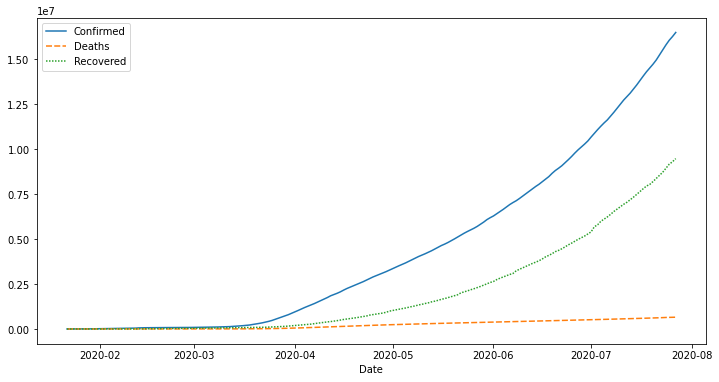

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = date_status)

## 지도시각화_folium간단연습

In [ ]:
folium.Map()

위도, 경도설정

In [ ]:
folium.Map(location=[37.567331, 126.976563])

확대 비율 설정

In [ ]:
folium.Map(location=[37.567331, 126.976563], zoom_start = 18)

원 표시 넣기

In [ ]:
m = folium.Map(location=[37.567331, 126.976563], zoom_start = 18)
folium.CircleMarker([37.567331, 126.976563], radius = 100).add_to(m)
m

원 채우기

In [ ]:
m = folium.Map(location=[37.567331, 126.976563], zoom_start = 18)
folium.CircleMarker([37.567331, 126.976563], radius = 100, color = 'red', fill = True, fill_color = 'red').add_to(m)
m

팝업 넣기

In [ ]:
m = folium.Map(location=[37.567331, 126.976563], zoom_start = 18)
folium.CircleMarker([37.567331, 126.976563], radius = 100, color = 'red', fill = True, fill_color = 'red',popup='hi').add_to(m)
m

## Folium을 활용하여 코로나바이러스 감염 지도 시각화

In [ ]:
latest_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [ ]:
m = folium.Map(location=[0,0], zoom_start = 5)
for i in latest_df.index:
  folium.CircleMarker([latest_df['Lat'][i], latest_df['Long'][i]], radius = int(latest_df['Confirmed'][i]/60000), color = 'red', fill = True, fill_color = 'red',popup=latest_df['Country/Region'][i] +':' + str(latest_df['Confirmed'][i])).add_to(m)
m